In [125]:
import numpy as np 
import matplotlib.pyplot as plt 
from skimage import io 
from skimage import filters, feature, segmentation, morphology
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage import measure
import math

##  INF250 Exam 2022
### Nora Mikarlsen 

#### Exercise 1

In [2]:
soccer_im = io.imread("soccerteam.jpg")
soccer_im = soccer_im.mean(axis=2)

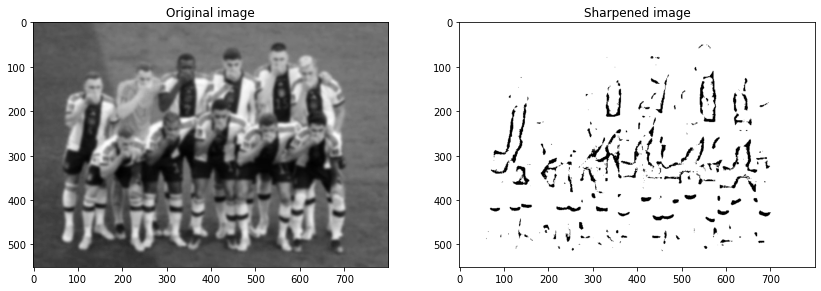

In [3]:
fig, axes = plt.subplots(ncols = 2, figsize =(14, 7))
ax = axes.ravel()
ax[0].imshow(soccer_im, cmap="gray")
ax[0].set_title("Original image")
ax[1].set_title("Sharpened image")

sharpened_im = filters.unsharp_mask(soccer_im, radius=3, amount=5)
ax[1].imshow(sharpened_im, cmap="gray")

In [136]:
def hist_equalisation(image):
    """
    Takes in an image, computes the original histogram for the image, then a cumulative histogram
    for the image, then performs a histogram equalisation on the image.

    :param image: original image
    :return: image_he: histogram equalised image
    """
    # Histogram equalisation
    shape = np.shape(image)
    if len(shape) == 3:
        image = image.mean(axis=2)

    histogram = np.zeros(256)
    for i in range(shape[0]):
        for j in range(shape[1]):
            pixval = int(image[i, j])
            try:
                histogram[pixval] += 1
            except IndexError:
                histogram[255] +=1

    cumhist = np.zeros(256)
    cumhist[0] = histogram[0]
    for i in range(255):
        cumhist[i + 1] = cumhist[i] + histogram[i + 1]

    K = 256
    M = shape[0]
    N = shape[1]
    image_he = np.zeros(image.shape)
    for i in range(M):
        for j in range(N):
            a = int(image[i, j])
            try:
                b = cumhist[a] * (K - 1) / M * N
            except IndexError:
                b = cumhist[255] * (K - 1) / M * N
            image_he[i, j] = b
   
    return image_he

In [137]:
hist_eq = hist_equalisation(soccer_im)

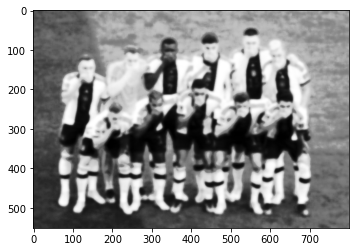

In [133]:
plt.imshow(hist_eq, cmap="gray")

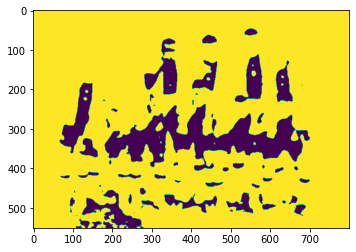

In [122]:
shp_im = filters.unsharp_mask(soccer_im, radius=100, amount=2)
plt.imshow(shp_im)

In [123]:
laplace_im = filters.laplace(soccer_im, ksize=4)

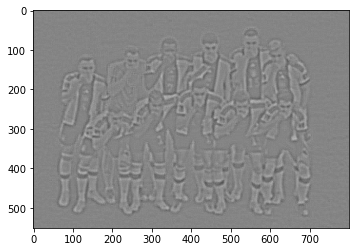

In [124]:
plt.imshow(laplace_im, cmap="gray")

In [125]:
laplace_im

array([[ 0.,  1.,  0., ...,  0., -1.,  0.],
       [ 0.,  2.,  0., ...,  1., -1.,  0.],
       [ 2., -2.,  1., ...,  1., -2., -1.],
       ...,
       [-2.,  1., -2., ..., -1., -1.,  1.],
       [-1.,  0.,  1., ...,  2.,  1.,  2.],
       [-1.,  0.,  0., ...,  1.,  0.,  1.]])

In [126]:
soccer_im

array([[ 86.66666667,  86.66666667,  85.66666667, ..., 110.33333333,
        109.33333333, 109.33333333],
       [ 86.66666667,  86.66666667,  85.66666667, ..., 110.33333333,
        109.33333333, 109.33333333],
       [ 86.66666667,  85.66666667,  85.66666667, ..., 110.33333333,
        109.33333333, 109.33333333],
       ...,
       [ 64.        ,  65.        ,  65.        , ...,  94.        ,
         95.        ,  96.        ],
       [ 64.        ,  65.        ,  66.        , ...,  95.        ,
         96.        ,  97.        ],
       [ 64.        ,  65.        ,  66.        , ...,  95.        ,
         96.        ,  97.        ]])

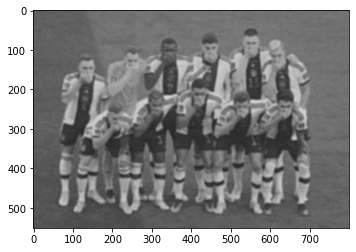

In [134]:
amount = 5
filtered = filters.laplace(soccer_im)
sharpened = soccer_im + amount*filtered
plt.imshow(sharpened, cmap="gray")

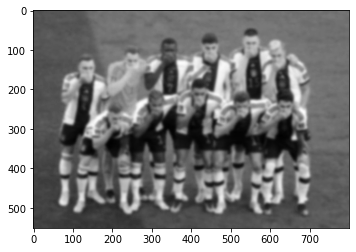

In [128]:
plt.imshow(soccer_im, cmap="gray")

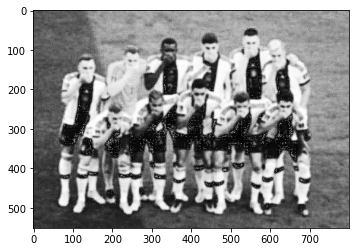

In [138]:
hist_im = hist_equalisation(sharpened)
plt.imshow(hist_im, cmap="gray")

In [130]:
soccer_im.shape

(551, 800)

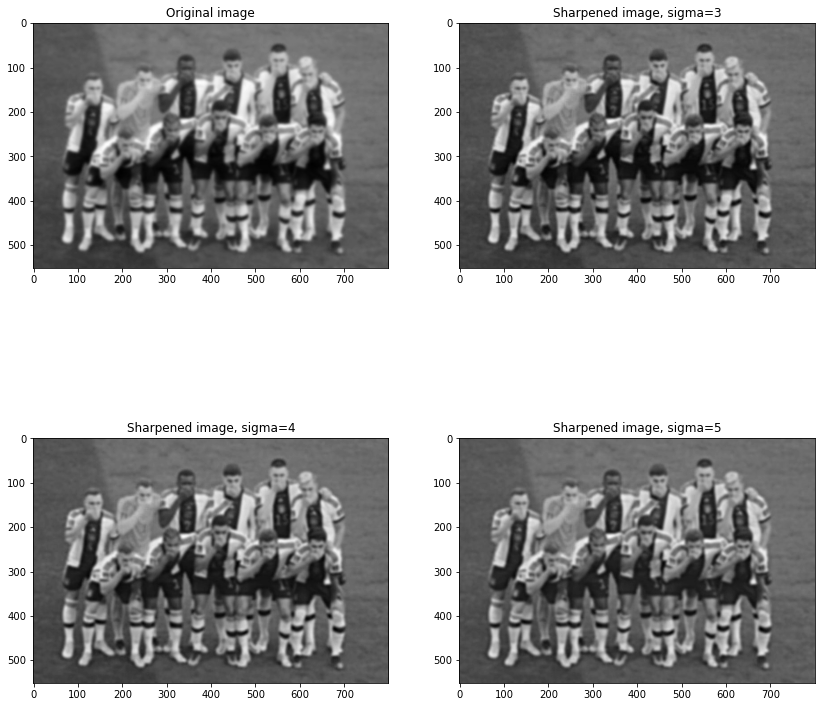

In [11]:

fig, axes = plt.subplots(ncols = 2, nrows=2, figsize =(14, 14))
ax = axes.ravel()
ax[0].imshow(soccer_im, cmap="gray")
ax[0].set_title("Original image")

blurred = filters.gaussian(soccer_im, sigma=3)
amount = 0.5
new_im = soccer_im - amount*blurred
ax[1].set_title("Sharpened image, sigma=3")
ax[1].imshow(new_im, cmap='gray')

blurred4 = filters.gaussian(soccer_im, sigma=4)
sigma4 =soccer_im - amount*blurred4
ax[2].set_title("Sharpened image, sigma=4")
ax[2].imshow(sigma4, cmap='gray')


blurred5 = filters.gaussian(soccer_im, sigma=5)
sigma5 =soccer_im - amount*blurred5
ax[3].set_title("Sharpened image, sigma=5")
ax[3].imshow(sigma5, cmap='gray')

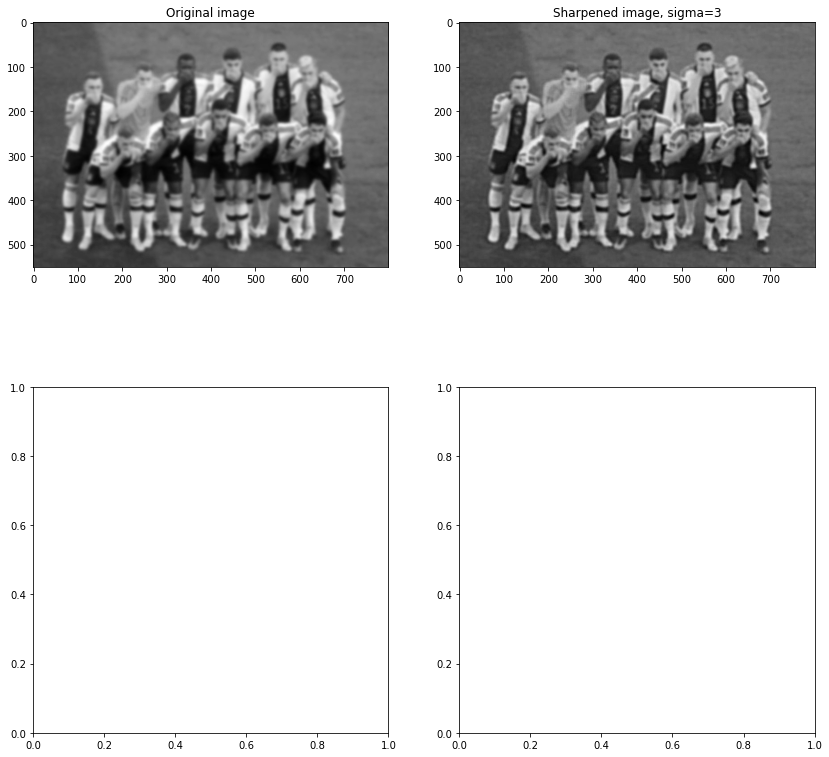

In [22]:
fig, axes = plt.subplots(ncols = 2, nrows=2, figsize =(14, 14))
ax = axes.ravel()
ax[0].imshow(soccer_im, cmap="gray")
ax[0].set_title("Original image")

blurred = filters.gaussian(soccer_im, sigma=3)
amount = 0.6
new_im = soccer_im - amount*blurred
ax[1].set_title("Sharpened image, sigma=3")
ax[1].imshow(new_im, cmap='gray')


TypeError: only size-1 arrays can be converted to Python scalars

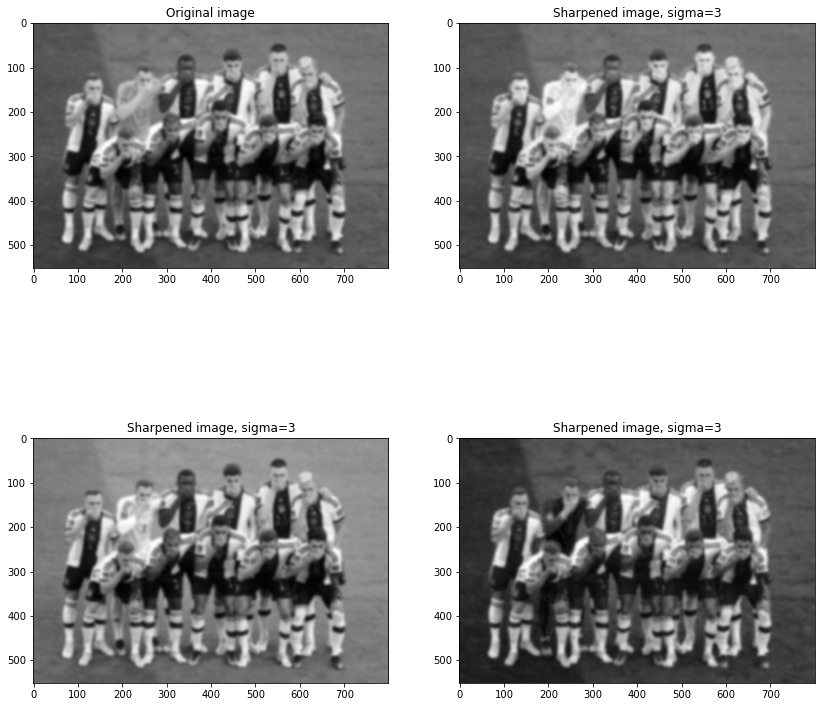

In [45]:
rgb_soccer = io.imread("soccerteam.jpg")

fig, axes = plt.subplots(ncols = 2, nrows=2, figsize =(14, 14))
ax = axes.ravel()
ax[0].imshow(soccer_im, cmap="gray")
ax[0].set_title("Original image")

red_ch = rgb_soccer[:,:, 0]
blurred = filters.gaussian(red_ch, sigma=3)
amount = 0.5
new_im = red_ch - amount*blurred
ax[1].set_title("Sharpened image, sigma=3")
ax[1].imshow(new_im, cmap='gray')

gr_ch = rgb_soccer[:,:, 1]
blurred2 = filters.gaussian(gr_ch, sigma=3)
amount = 0.5
new_im2 = gr_ch- amount*blurred2
ax[2].set_title("Sharpened image, sigma=3")
ax[2].imshow(new_im2, cmap='gray')

blue_ch = rgb_soccer[:,:, 2]
blurred2 = filters.gaussian(blue_ch, sigma=3)
amount = 0.5
new_im3 = blue_ch- amount*blurred2
ax[3].set_title("Sharpened image, sigma=3")
ax[3].imshow(new_im3, cmap='gray')

shp_im = np.zeros(rgb_soccer.shape)
shp_im[:,:,0] = new_im
shp_im[:,:,1] = new_im2
shp_im[:,:,2] = new_im3

In [44]:
plt.imshow(int(shp_im))

TypeError: only size-1 arrays can be converted to Python scalars

### Exercise 1 b
 Canny filter

A canny filter is a filter used for edge detection. 

The image on the left is a canny filter applied to the unsharpened image, and the one on the right is canny filter applied to the sharpened image. One can tell the difference because the one on the left contains a lot less edges. One feature of an unsharpened image is that everything is a bit blurry, and therefore it's not as easy to distinguish edges. 


Text(0.5, 1.0, 'Canny filter on sharpened image, sigma=1')

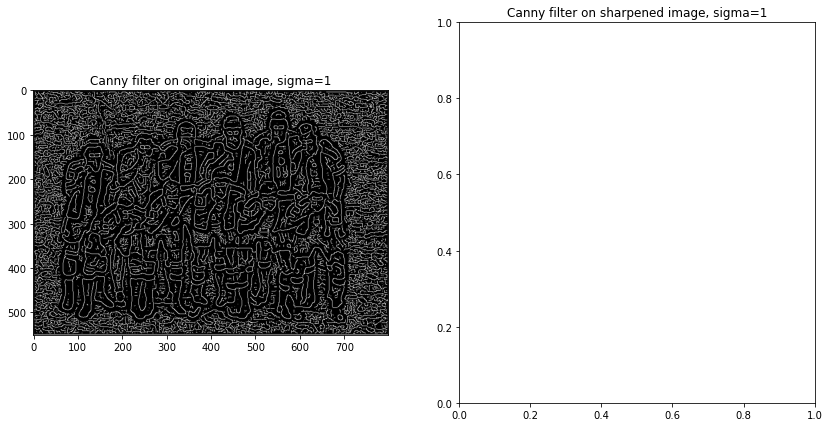

In [13]:
# Sigma = 1

canny1_og = feature.canny(soccer_im, sigma=1)
fig, axes = plt.subplots(ncols = 2, figsize =(14, 7))
ax = axes.ravel()
ax[0].imshow(canny1_og, cmap="gray")
ax[0].set_title("Canny filter on original image, sigma=1")
ax[1].set_title("Canny filter on sharpened image, sigma=1")



Text(0.5, 1.0, ' Canny filter on sharpened image, sigma=3')

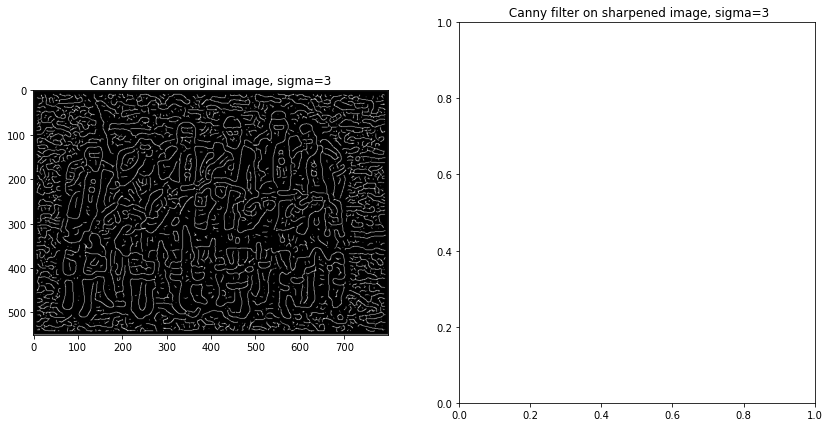

In [14]:
# Sigma = 3

canny2_og = feature.canny(soccer_im, sigma=3)
fig, axes = plt.subplots(ncols = 2, figsize =(14, 7))
ax = axes.ravel()
ax[0].imshow(canny2_og, cmap="gray")
ax[0].set_title("Canny filter on original image, sigma=3")
ax[1].set_title(" Canny filter on sharpened image, sigma=3")


Text(0.5, 1.0, 'Canny filter on sharpened image, sigma=5')

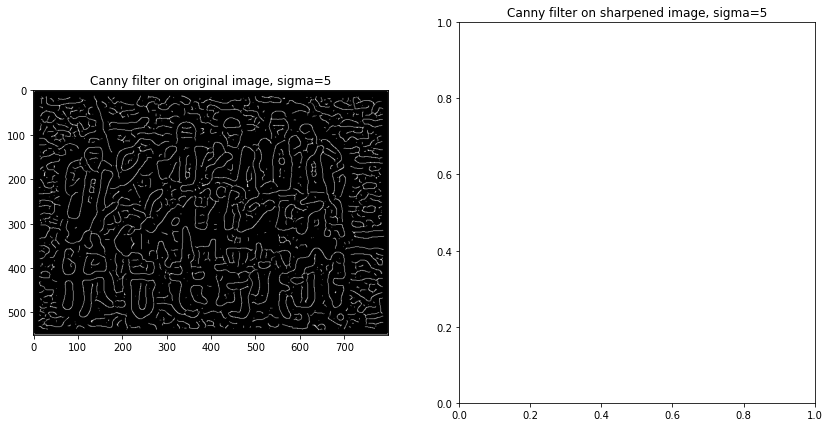

In [12]:
# Sigma = 5

canny3_og = feature.canny(soccer_im, sigma=5)
fig, axes = plt.subplots(ncols = 2, figsize =(14, 7))
ax = axes.ravel()
ax[0].imshow(canny3_og, cmap="gray")
ax[0].set_title("Canny filter on original image, sigma=5")
ax[1].set_title("Canny filter on sharpened image, sigma=5")


What we see is that as the sigma value increases, there are less edges being found, in this case that means there is less noise, but for significantly high sigma values it could also mean that you lose detail. 

### Exercise 2

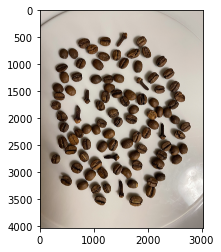

In [83]:
coffee = io.imread("coffeebeans.jpg")
plt.imshow(coffee)

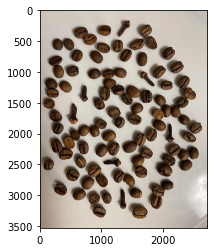

In [84]:
# Remove border, don't need that, might cause some noise when working with the image. 

coffee2 = coffee[250:-250, 150:-150, :] # This is about as much as I can remove and still keep all the cofffeebeans
plt.imshow(coffee2)

Text(0.5, 1.0, 'Blue channel')

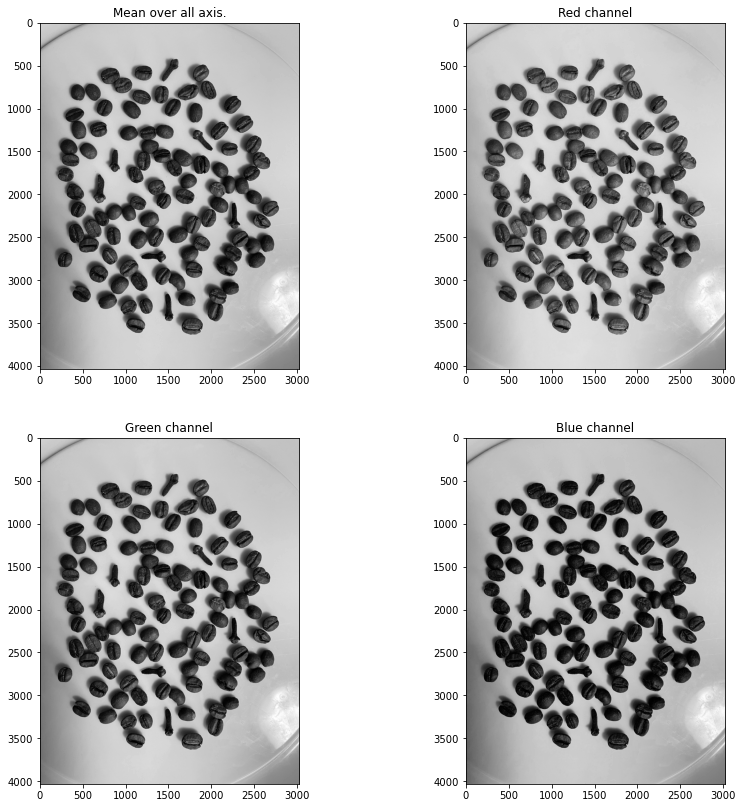

In [85]:
fig, axes = plt.subplots(ncols = 2, nrows=2, figsize =(14, 14))
ax = axes.ravel()
ax[0].imshow(coffee.mean(axis=2), cmap="gray")
ax[0].set_title("Mean over all axis.")
ax[1].set_title("Sharpened image")

ax[1].imshow(coffee[:,:,0], cmap="gray")
ax[1].set_title("Red channel")

ax[2].imshow(coffee[:,:,1], cmap="gray")
ax[2].set_title("Green channel")

ax[3].imshow(coffee[:,:, 2], cmap="gray")
ax[3].set_title("Blue channel")

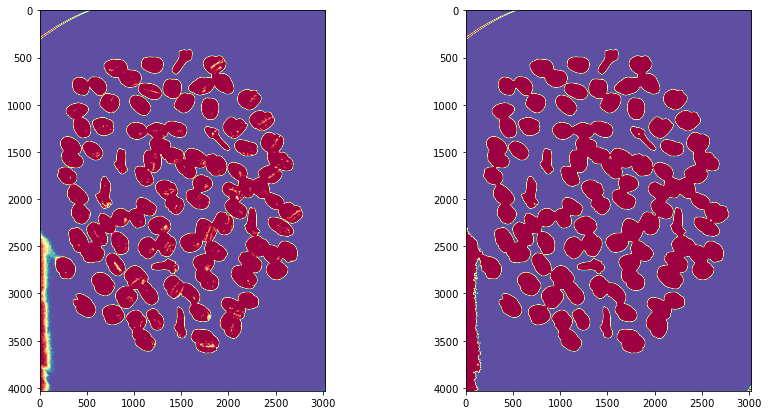

In [117]:
# Otsu threshold
#coffee = coffee.mean(axis=2)
thresh = filters.threshold_otsu(coffee)
otsu_im = coffee > thresh
fig, axes = plt.subplots(ncols=2, figsize=(14,7))
ax = axes.ravel()
ax[0].imshow(otsu_im, cmap='Spectral')

# Opening

opened_im = morphology.opening(otsu_im, morphology.square(10))
ax[1].imshow(opened_im, cmap='Spectral')

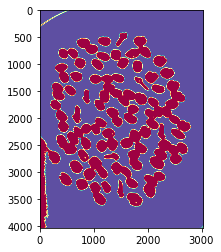

In [113]:
# Opening

opened_im = morphology.opening(otsu_im, morphology.square(7))
plt.imshow(opened_im, cmap='Spectral')

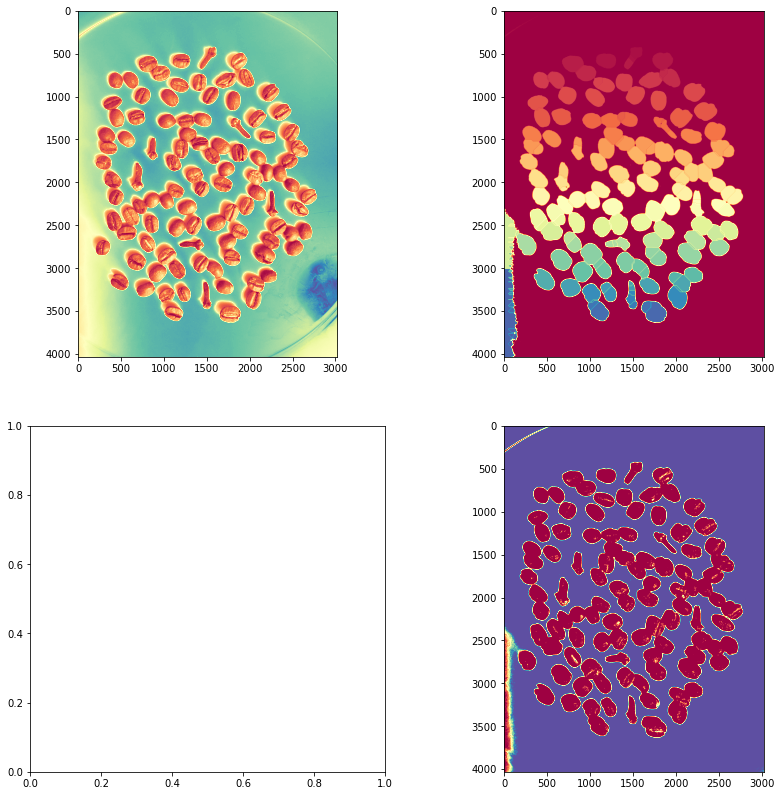

In [150]:
# Watershed


im = np.invert(opened_im)
distance = ndi.distance_transform_edt(im)
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=im, min_distance=50)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = segmentation.watershed(-distance, markers, mask=im, watershed_line=True)
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(14, 14))
ax = axes.ravel()
ax[3].imshow(otsu_im, cmap="Spectral")
ax[1].imshow(labels, cmap='Spectral')
ax[0].imshow(coffee, cmap='Spectral')


In [149]:
print(f'Amount of objects = {len(np.unique(labels))}') 

Amount of objects = 218


In [139]:
# Measure

labels2 = measure.label(labels)
properties = measure.regionprops(labels2)

circularity = []
mask = np.ones(np.shape(coffee))
round_list = []
for ix, prop in enumerate(properties):
    if prop.perimeter != 0:
        circ = 4*math.pi*prop.area/prop.perimeter**2
        circularity.append(circ)
        roundness = 4*(prop.area/(math.pi*prop.axis_major_length**2))
        round_list.append(roundness)
        if circ < 0.6 or roundness < 0.5: 
            for ix, coords in enumerate(prop.coords):
                mask[coords[0]][coords[1]] = 0

(array([ 1.,  4.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  2.,  3.,  4.,  5.,
         0.,  9., 20., 20., 20., 32., 27.]),
 array([0.06188357, 0.1015068 , 0.14113002, 0.18075325, 0.22037648,
        0.2599997 , 0.29962293, 0.33924616, 0.37886938, 0.41849261,
        0.45811583, 0.49773906, 0.53736229, 0.57698551, 0.61660874,
        0.65623197, 0.69585519, 0.73547842, 0.77510165, 0.81472487,
        0.8543481 ]),
 <BarContainer object of 20 artists>)

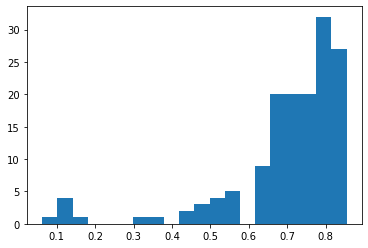

In [137]:
plt.hist(circularity, bins=20)

(array([ 4.,  1.,  1.,  1.,  3.,  1.,  1.,  2.,  5.,  1.,  4., 14., 13.,
        17., 16., 12., 24., 17.,  8.,  5.]),
 array([0.00974519, 0.05726348, 0.10478177, 0.15230006, 0.19981834,
        0.24733663, 0.29485492, 0.3423732 , 0.38989149, 0.43740978,
        0.48492806, 0.53244635, 0.57996464, 0.62748292, 0.67500121,
        0.7225195 , 0.77003778, 0.81755607, 0.86507436, 0.91259264,
        0.96011093]),
 <BarContainer object of 20 artists>)

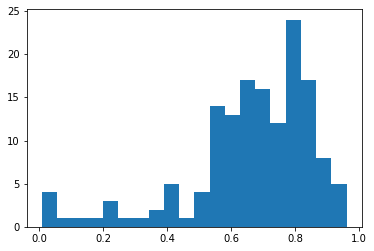

In [138]:
plt.hist(round_list, bins=20)

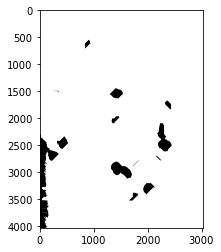

In [140]:
plt.imshow(mask, cmap='gray')


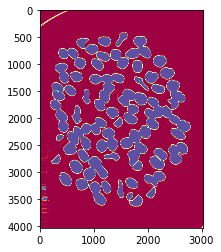

In [142]:
plt.imshow(im*mask, cmap='Spectral')

### Exercise 3

In [151]:
from spectral import *
import numpy as np
import matplotlib.pyplot as plt 
import skimage

#### Exercise 3a)

In [155]:
hyperim = np.load("nmbu.npy")
wavelength = envi.read_envi_header('nmbu.hdr')['wavelength']
ww = [float(i) for i in wavelength]

In [156]:
# Function for band number closest to desired wavelength
def band_num(desired_ww, ww):
    l_min = 100 # Just a default number
    for ix, w in enumerate(ww):
        l = abs(desired_ww - w) # Finds the difference between desired wavelenght and the actual wavelength
        if l < l_min: # If the difference is smaller than l_min, it overwrites l_min and updates closest_ww
            l_min = l 
            closest_ww = ix
    return closest_ww

bww = band_num(440, ww) # Band corresponding to blue wavelength
gww = band_num(535, ww) # Band corresponding to green wavelength
rww = band_num(645, ww) # Band corresponding to red wavelength
nirww = band_num(800, ww)
print(rww, gww, bww, nirww)

75 41 11 124


ImageView object:
  Display bands       :  (75, 41, 11)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.003924822900444269, 0.08348371833562851]
    G: [0.007238264195621014, 0.08871068805456161]
    B: [0.007972076535224915, 0.0653458759188652]

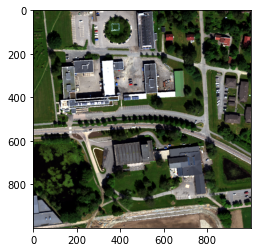

In [157]:
imshow(hyperim, (rww, gww, bww), stretch=((0.02,0.98),(0.02,0.98),(0.02,0.98)))


From the image displayed here, we see that this corresponds pretty well to how an RGB image would look. 

#### Exercise 3b)

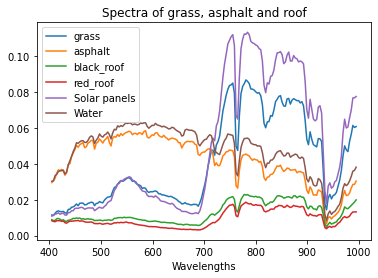

In [164]:
# Select a point with vegetation, one with asphalt and one with a roof and plot the spectra and show them in the report.  
grass = np.array(hyperim[400,50,:].reshape(-1,1))
asph = np.array(hyperim[600,300,:].reshape(-1,1))
black_roof = np.array(hyperim[450,700,:].reshape(-1,1))
red_roof = np.array(hyperim[100,630,:].reshape(-1,1))
solar = np.array(hyperim[430,450,:].reshape(-1,1))
water = np.array(hyperim[900,730,:].reshape(-1,1))
plt.figure()
plt.plot(ww,grass, label="grass")
plt.plot(ww,asph, label='asphalt')
plt.plot(ww,black_roof, label='black_roof')
plt.plot(ww,red_roof, label='red_roof')
plt.plot(ww,solar, label='Solar panels')
plt.plot(ww,water, label='Water')
plt.legend()
plt.title("Spectra of grass, asphalt and roof")
plt.xlabel("Wavelengths")
plt.show()

# I think solar, water, and red_roof might be wrong as their spectra are too close to the others. I might have picked the wrong spots. 

#### Exercise 3c)

In [167]:
def compute_ndvi(image, ww):
    rww = band_num(645, ww)
    nirww = band_num(800, ww)
    ndvi = (image[:,:,nirww] - image[:,:,rww])/(image[:,:,nirww] + image[:,:,rww])
    return ndvi

ndvi_im = compute_ndvi(hyperim, ww)

ImageView object:
  Display bands       :  (75, 41, 11)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.003924822900444269, 0.08348371833562851]
    G: [0.007238264195621014, 0.08871068805456161]
    B: [0.007972076535224915, 0.0653458759188652]

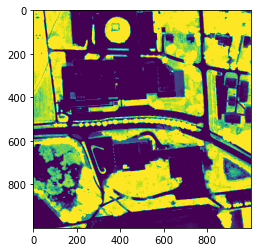

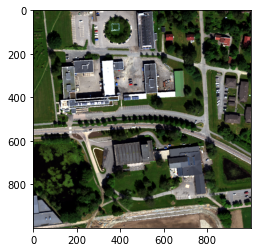

In [172]:
plt.imshow(ndvi_im,vmin=0,vmax=0.7)
imshow(hyperim, (rww, gww, bww), stretch=((0.02,0.98),(0.02,0.98),(0.02,0.98)))

#### Exercise 3d)

Looking at the ndvi image next to the rgb image, we see that this checks out relatively well with what is vegetation and what is not. Some of the trees in the left down corner hasn't been totally included, possibly because their shadows are so dark. 

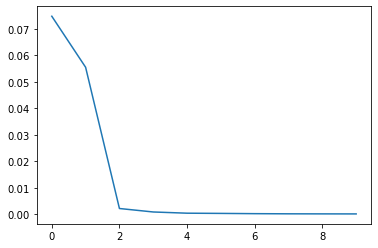

In [177]:
pc = principal_components(hyperim)
plt.figure()
plt.plot(pc.eigenvalues[0:10])
pc_0999 = pc.reduce(fraction=0.999)


In [178]:
img_pc = pc_0999.transform(hyperim)


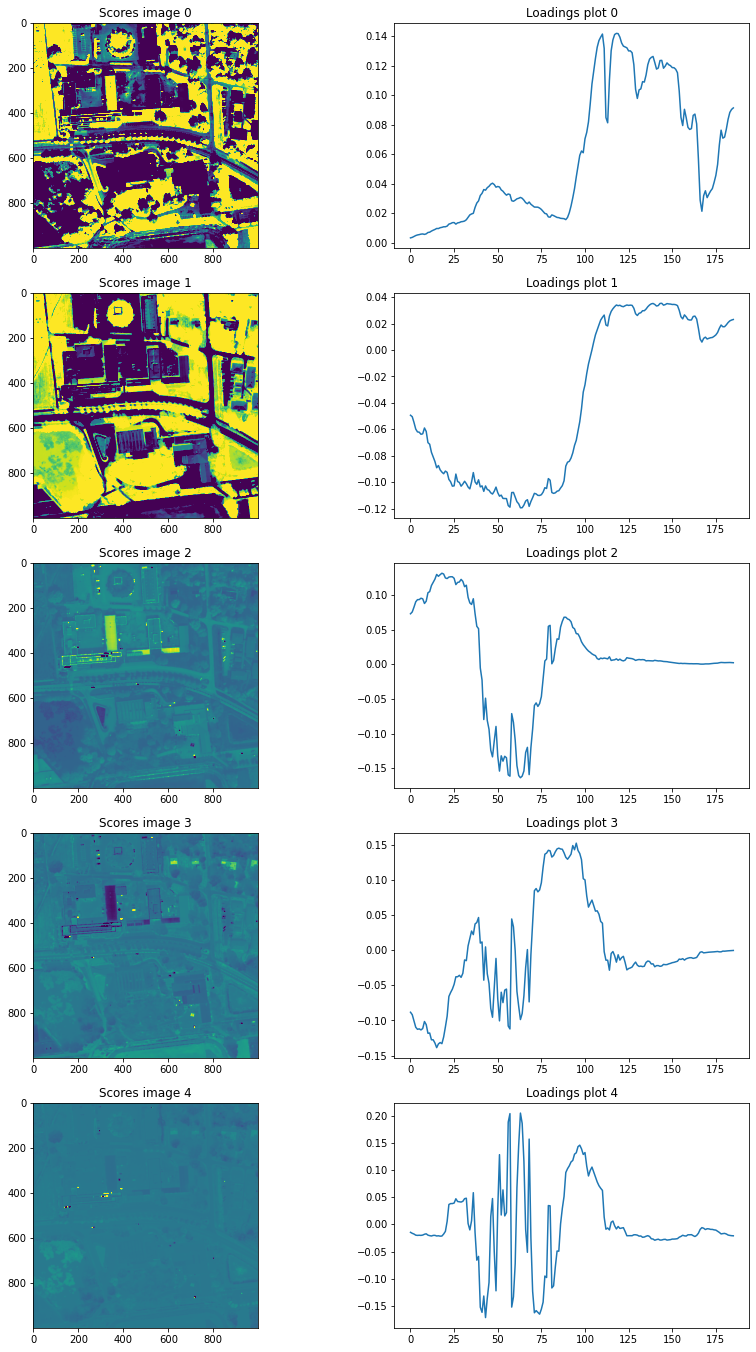

<Figure size 432x288 with 0 Axes>

In [196]:
fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(14, 24))
ax = axes.ravel()
# Score images
ax[0].imshow(img_pc[:,:,0], vmin=-0.1,vmax=0.15)
ax[2].imshow(img_pc[:,:,1], vmin=-0.1,vmax=0.15)
ax[4].imshow(img_pc[:,:,2], vmin=-0.1,vmax=0.15)
ax[6].imshow(img_pc[:,:,3], vmin=-0.1,vmax=0.15)
ax[8].imshow(img_pc[:,:,4], vmin=-0.1,vmax=0.15)

for i in range(0, 10, 2):
    ax[i].set_title(f"Scores image {int(i/2)}")

#Loadings plots

loadings = pc_0999.eigenvectors
plt.figure()
ax[1].plot(loadings[:,0])
ax[3].plot(loadings[:,1])
ax[5].plot(loadings[:,2])
ax[7].plot(loadings[:,3])
ax[9].plot(loadings[:,4])

for i in range(1, 10, 2):
    ax[i].set_title(f"Loadings plot {int(i/2)}")

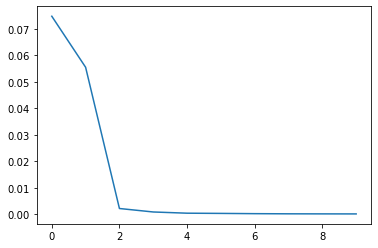

In [197]:
# Plot of eigenvalues 
plt.plot(pc.eigenvalues[0:10])

I think there is such a break in the curve at component number 2, because by then most of the variance has been explained. Adding more components will only add slight variance. 

In [198]:
# How much variance is explained by the first two eigenvalues?
pc_2eigs = pc.reduce(num=2)

In [200]:
pc.stats.mean

array([0.01921292, 0.01915944, 0.02028092, 0.02169707, 0.02216554,
       0.02202107, 0.02234874, 0.02204616, 0.0204189 , 0.02104379,
       0.02371883, 0.02402815, 0.02581126, 0.02680193, 0.02777774,
       0.02916186, 0.028555  , 0.02929506, 0.02964784, 0.02971587,
       0.02875538, 0.0286299 , 0.02957351, 0.02990569, 0.03058415,
       0.03028736, 0.02764306, 0.02902692, 0.0292539 , 0.03011581,
       0.0296917 , 0.02901831, 0.02984056, 0.03038693, 0.03110324,
       0.03029337, 0.02947524, 0.0320804 , 0.03346962, 0.03346086,
       0.03514974, 0.03524736, 0.03608236, 0.03563434, 0.03633673,
       0.03663288, 0.03690537, 0.03718012, 0.03679318, 0.03569117,
       0.03576465, 0.03540035, 0.03482725, 0.03464318, 0.03410913,
       0.03342379, 0.0338689 , 0.03374601, 0.03189825, 0.03135931,
       0.03185561, 0.03215712, 0.03213359, 0.03264353, 0.03249953,
       0.03182264, 0.03112775, 0.03060318, 0.03103173, 0.03061734,
       0.03012313, 0.02973978, 0.02989096, 0.02999512, 0.02978

In [203]:
print(pc.eigenvalues)

[7.48268111e-02 5.55284745e-02 2.12114151e-03 8.07678221e-04
 3.47043257e-04 2.68080132e-04 1.70233223e-04 1.13537686e-04
 8.97756055e-05 7.43630241e-05 5.04510664e-05 4.10978578e-05
 3.26563672e-05 2.62700123e-05 2.11921159e-05 1.83749656e-05
 1.78006376e-05 1.51503375e-05 1.30691079e-05 1.22106107e-05
 1.10759955e-05 1.02915201e-05 9.73871866e-06 9.14296538e-06
 8.40512028e-06 7.57550226e-06 7.13586232e-06 6.73914743e-06
 6.40339726e-06 5.97268182e-06 5.80739520e-06 5.57710180e-06
 5.15286655e-06 4.95853677e-06 4.83447579e-06 4.64602315e-06
 4.45506792e-06 4.24404837e-06 4.13924709e-06 4.03588924e-06
 3.82392025e-06 3.70530356e-06 3.35415020e-06 3.27597550e-06
 3.04830065e-06 3.01045981e-06 2.85386696e-06 2.65585382e-06
 2.51376249e-06 2.43138483e-06 2.33594389e-06 2.18781654e-06
 2.14532953e-06 2.02046628e-06 1.89270745e-06 1.86632831e-06
 1.76612675e-06 1.62070058e-06 1.56770828e-06 1.30177279e-06
 1.14795987e-06 1.14053442e-06 1.06502142e-06 1.05214991e-06
 9.92205728e-07 9.586984

In [204]:
# How many components do you need to cover 99.9 % of variance? 
pc_0999 = pc.reduce(fraction=0.999)
len(pc_0999.eigenvalues)

31

You would need 31 components to cover 99.9 % of the variance. 

#### Exercise 3e)

spectral:INFO: Setting min samples to 186


Processing...  0.0Processing... 25.0Processing... 50.0Processing... 75.0Processing... 100.Processing...done   


ImageView object:
  Display bands       :  (75, 41, 11)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.003924822900444269, 0.08348371833562851]
    G: [0.007238264195621014, 0.08871068805456161]
    B: [0.007972076535224915, 0.0653458759188652]

<Figure size 432x288 with 0 Axes>

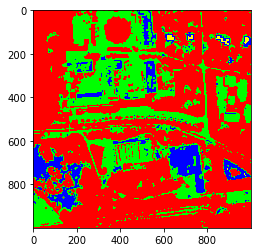

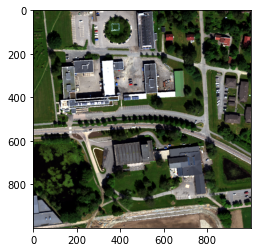

In [225]:
# Gaussian Maximum Likelihood Classification with 4 classes
groundtruth = np.zeros([hyperim.shape[0],hyperim.shape[1]])

groundtruth[400:500,0:100] = 1.0   #grass
groundtruth[600:630, 300:330] = 2.0 # asphalt
groundtruth[650:700,650:700] = 3.0 # Black roof

groundtruth[120:140, 630:650] = 4.0 # Red roof

classes = create_training_classes(hyperim, groundtruth)
gmlc = GaussianClassifier(classes)
clmap = gmlc.classify_image(hyperim)
plt.figure()
imshow(classes=clmap)
imshow(hyperim, (rww, gww, bww), stretch=((0.02,0.98),(0.02,0.98),(0.02,0.98)))

Here we have done a Gaussian Maximum Likelihood Classification with 4 classes. From looking at the image it seems that vegetation was captured pretty nicely. The black roof was sometimes classified as asphalt, this likely due to the colours of the roof and the colours of the asphalt being similiar. I also used the darkest roof as classification for the black roof, which may not have been the best idea, it might have yielded better results to use some of the roofs that were more dark gray. 

The trees in the downmost left corner, have been classified as roof, probably because of the dark shadow being cast by them. 

The asphalt was classified relatively well, except for some of the roofs also getting into this class. 
